In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

### Gennemsnitlig temperaturafvigelse fra nuværende gennemsnitstemperatur i intervaller af 20 år gennem den holocæne periode

Text(0.5, 1.0, 'Gennemsnitlig temperaturafvigelse gennem den Holocæne periode')

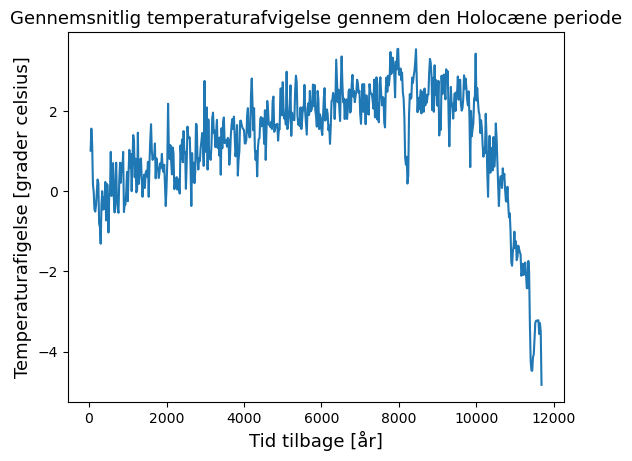

In [2]:
data1 = pd.read_excel('20temperatur.xlsx', header=29, skipfooter = 1)
data1 = data1.to_numpy()

år20 = data1[:,0]
temperatur20 = data1[:,1]

plt.plot(år20,temperatur20)

plt.xlabel('Tid tilbage [år]', fontsize = 13)
plt.ylabel('Temperaturafigelse [grader celsius]', fontsize = 13)
plt.title("Gennemsnitlig temperaturafvigelse gennem den Holocæne periode", fontsize = 13)

### Temperaturmålinger gennem de sidste 150 år

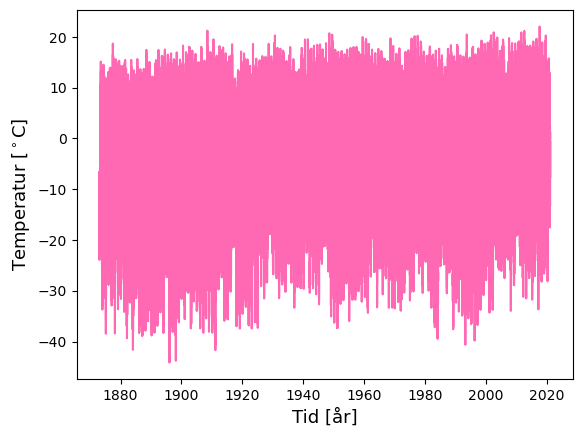

In [3]:
data2 = pd.read_excel('DailyMinMax_Ilullisat_Cor.xlsx', header=1)
data2 = data2.to_numpy()

år150 = data2[:,0]
temperatur150 = data2[:,1]

plt.xlabel('Tid [år]', fontsize = 13)
plt.ylabel(r'Temperatur [$^\circ$C]', fontsize = 13)

plt.plot(år150,temperatur150, c = 'hotpink')

### Forskel på midt indlandsistemperatur og kysttemperatur

Forskellen er 5.5608806093626635


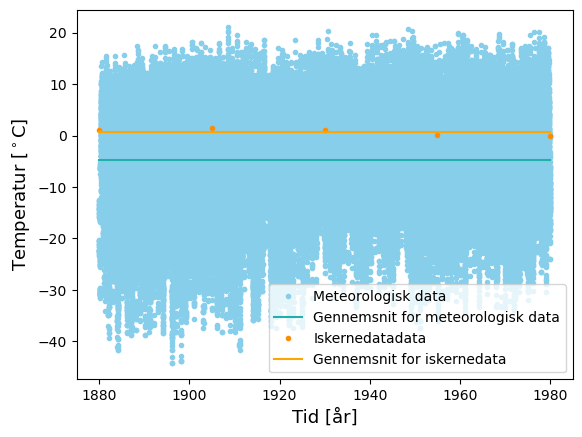

In [4]:
gns1 = np.average(temperatur20[0:5])

top = 1980
bund = 1880
temp_X = temperatur150[(år150 >= bund)&(år150 < top)]

gns2 = np.average(temp_X)

forskel = np.absolute(gns1 - gns2)

plt.plot(np.linspace(1880,1980,len(temp_X)),temp_X, '.', c = 'skyblue', label = 'Meteorologisk data')
plt.plot(np.linspace(1880,1980,100), np.linspace(gns2,gns2,100), c = 'lightseagreen', label = 'Gennemsnit for meteorologisk data')

plt.plot(np.linspace(1880,1980,5),temperatur20[0:5], '.', c = 'darkorange', label = 'Iskernedatadata')
plt.plot(np.linspace(1880,1980,100), np.linspace(gns1,gns1,100), c = 'orange', label = 'Gennemsnit for iskernedata')

plt.legend()
plt.xlabel('Tid [år]', fontsize = 13)
plt.ylabel(r'Temperatur [$^\circ$C]', fontsize = 13)

print("Forskellen er", forskel)

## Udvælger 20 år (år 1955-1975) og bruger deres årstidscyklus på iskernedata

[1955.     1955.0014 1955.0027 ... 1974.9959 1974.9973 1974.9986]


Text(0, 0.5, 'Temperaturafvigelse [$^\\circ$C]')

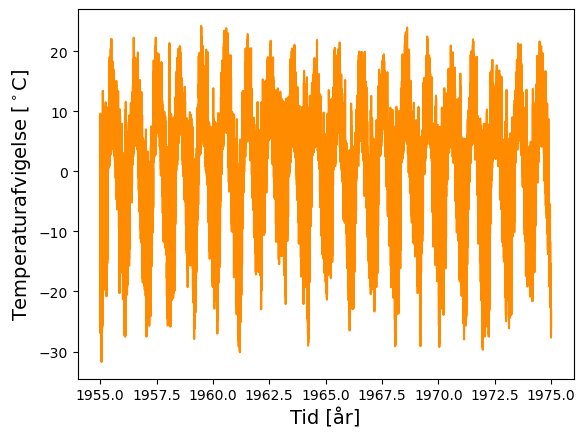

In [5]:
top = 1975
bund = 1955
maske = (år150 >= bund)&(år150 < top)

år_X = år150[maske]
temp_X = temperatur150[maske]
temp_X_afv = temp_X-np.average(temp_X)

print(år_X)
plt.plot(år_X,temp_X_afv, c = 'darkorange')
plt.xlabel('Tid [år]', fontsize = 14)
plt.ylabel(r'Temperaturafvigelse [$^\circ$C]', fontsize = 14)

### Interpolerer

In [6]:
år_inter = np.array([])
temp_inter = np.array([])

for i in range(len(år_X)-1):
    
    tid_a = år_X[i]
    tid_b = (år_X[i] + år_X[i+1])/2
    
    temp_a = temp_X_afv[i]
    temp_b = (temp_X_afv[i] + temp_X_afv[i+1])/2
    

    år_inter = np.append(år_inter,tid_a)
    år_inter = np.append(år_inter,tid_b)
    
    temp_inter = np.append(temp_inter,temp_a)
    temp_inter = np.append(temp_inter,temp_b)

In [7]:
temp_array = np.array([])
år_array = np.array([])

for i, j in np.nditer([temperatur20, år20]):
    temp_c = i + temp_inter - forskel #kysttemperatur
    år_c = j + år_inter

    temp_array = np.append(temp_array, temp_c)
    år_array = np.append(år_array, år_c)

Text(0, 0.5, 'Temperatur [$^\\circ$C]')

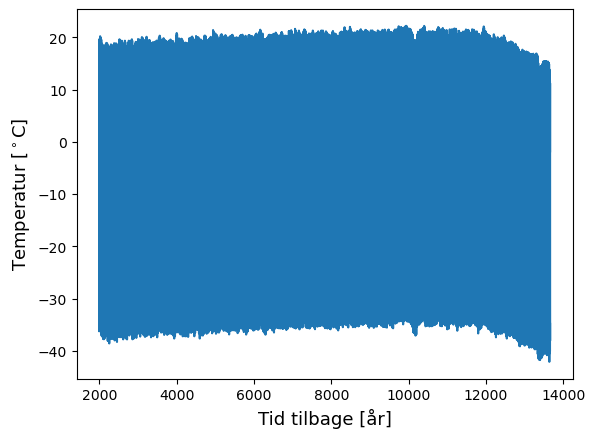

In [8]:
plt.plot(år_array, temp_array)
plt.xlabel('Tid tilbage [år]', fontsize = 13)
plt.ylabel(r'Temperatur [$^\circ$C]', fontsize = 13)

# Importering af iskernedata

### NGRIP

Text(0.5, 1.0, 'Akkumulationsrate over tid NGRIP')

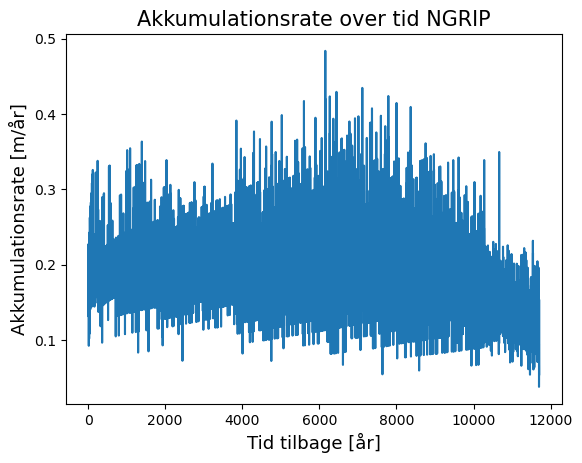

In [9]:
NGRIP = pd.read_excel('NGRIP.xlsx', header=58) #gik fra header = 66 #skulle have været header = 58, men for at få str til at passe med GRIP springes ned til år 12 i stedet for at starte med år 4
NGRIP = NGRIP.to_numpy()

NGRIP_age = NGRIP[:,0]
NGRIP_årstal = NGRIP[:,1]
NGRIP_acc_rate = NGRIP [:,6]

plt.plot(NGRIP_age, NGRIP_acc_rate)
plt.xlabel('Tid tilbage [år]', fontsize = 13)
plt.ylabel('Akkumulationsrate [m/år]', fontsize = 13)
plt.title("Akkumulationsrate over tid NGRIP", fontsize = 15)

### GRIP

Text(0.5, 1.0, 'Akkumulationsrate over tid GRIP')

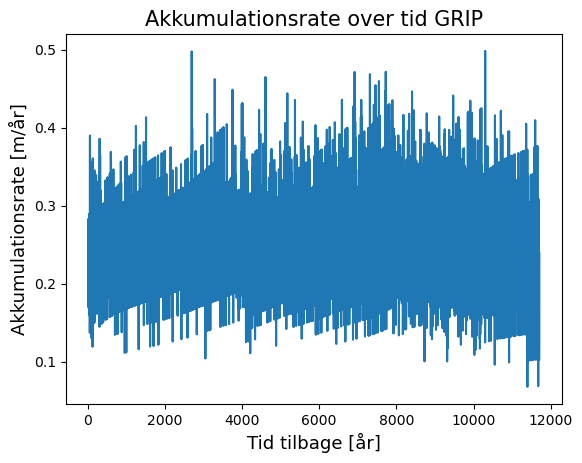

In [10]:
GRIP = pd.read_excel('GRIP.xlsx', header=54) #før: header = 55 #før: skipfooter = 3 for både NGRIP og GRIP #jeg indlæser fra 12. år, selvom data går tilbage til 11. år fordi ej data første år for akkumulationsrate. egentlig have jeg header = 54
GRIP = GRIP.to_numpy()

GRIP_age = GRIP[:,0]
GRIP_årstal = GRIP[:,1]
GRIP_acc_rate = GRIP [:,5]

plt.plot(GRIP_age, GRIP_acc_rate)
plt.xlabel('Tid tilbage [år]', fontsize = 13)
plt.ylabel('Akkumulationsrate [m/år]', fontsize = 13)
plt.title("Akkumulationsrate over tid GRIP", fontsize = 15)

In [11]:
print(GRIP_årstal)
print(NGRIP_årstal)

[ 1989.  1988.  1987. ... -9702. -9703. -9704.]
[ 1996.  1995.  1994. ... -9702. -9703. -9704.]


### Gennemsnitlig akkumulationsrate

In [12]:
print(np.absolute(2000 - år20[-1] + 20))
print(GRIP_age[-1])
print(NGRIP_age[-1])

print(2000 - år20[0] + 20)
print(GRIP_årstal[0])
print(NGRIP_årstal[0])

9660.0
11703.0
11703.0
1980.0
1989.0
1996.0


In [13]:
gns_acc_rate1 = np.array([0.2])
gns_acc_rate1 = np.append(gns_acc_rate1, (GRIP_acc_rate[1:] + NGRIP_acc_rate[8:])/2) #m is/år fra år 1989
gns_acc_rate1 = gns_acc_rate1[15:]

In [14]:
gns_acc_rate = np.repeat(gns_acc_rate1, 365.25*4)*1/(365.25*4)

In [15]:
print(len(gns_acc_rate))

17061558


In [16]:
print(len(temp_array))

17034094


Jeg skal interpolerere anerledes eller gøre et eller andet, for selvfølgelig passer længderne ikke

# Kørsel

Simulationen:

In [21]:
V = 2.85 * 10**15        #m^3
H = 3 * 10**3            #m
R = 500 * 10**3          #m
T_f = 0                  #grader
alfa = - 9.8 * 10**(-3)  #temperaturændring pr. højdeforøgelse (deg C/m)
k = H/np.sqrt(R)         #formfaktor. Vi antager, at iskappens form ikke ændrer sig
dt = 1/(4*365.25)        #tidsskridt i år

k_melt = 8.5 * 5 * 2 * 10**(-1)  #Smeltekonstant    
k_acc = 2*7/4              #Tuningskonstant for akkumulationen

V_list = []
# V_melt_list = []         #For overbliks skyld
# acc_list = []
# R_list = []

N = 1000000

for i, j in np.nditer([temp_array[0:N], gns_acc_rate[0:N]]):
    
    R = (3/16 * V/k)**(2/5)  #Jeppes formel. Undersøges senere
    V_acc = k_acc * (j * 8 * R**2)*dt  #Volumen tilført pr tidsskridt.
    
    if i - T_f < 0:
        V_melt = 0
        
    elif i == 0:
        V_melt = 0
        
    elif i - T_f > 0:
        V_melt = dt*k_melt * 8/3 * R * (i - T_f) * ((T_f - i)/(alfa * k))**2 #Vi undersøger dette integrale senere #Tiføj ekstra getjerkonstant fra isbjergedannelse. + k_isbjerg
        #og r_f = R - ((T_f - temp[t])/(alfa * k))**2
       
    V += - V_acc + V_melt  #Omvendt fortegn for at gå tilbage i tid
    V_list.append(V)
#     V_melt_list.append(V_melt)
#     acc_list.append(V_acc)
#     R_list.append(R)

For N = 8517630
CPU times: total: 51.4 s
Wall time: 1min 7s
    
For N = 1000000
CPU times: total: 5.16 s
Wall time: 8.76 s

Text(0, 0.5, 'Volumen[m^3]')

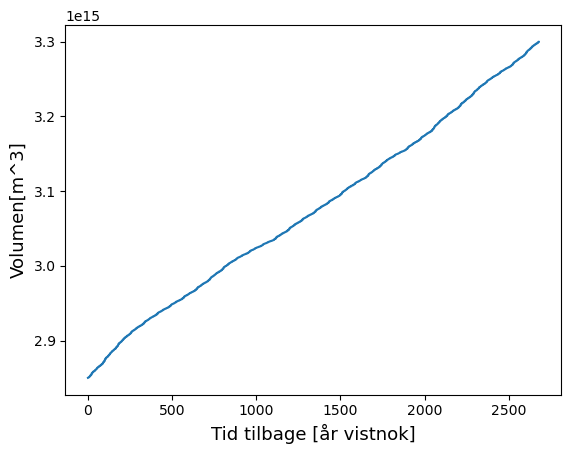

In [24]:
plt.plot(np.linspace(0, år_array[N], len(V_list)), V_list)
plt.xlabel('Tid tilbage [år vistnok]', fontsize = 13)
plt.ylabel('Volumen[m^3]', fontsize = 13)

Text(0, 0.5, 'Volumen[m^3]')

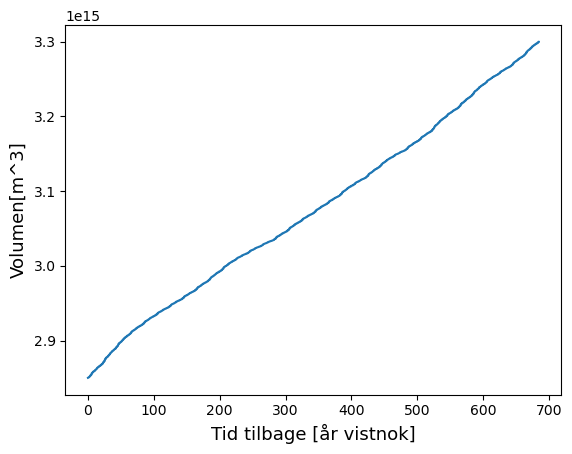

In [25]:
plt.plot(np.linspace(0, dt*N, len(V_list)), V_list)
plt.xlabel('Tid tilbage [år vistnok]', fontsize = 13)
plt.ylabel('Volumen[m^3]', fontsize = 13)

Øv, de burde have samme tidsakse.